### Predict Calorie Expenditure

#### Evaluation

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

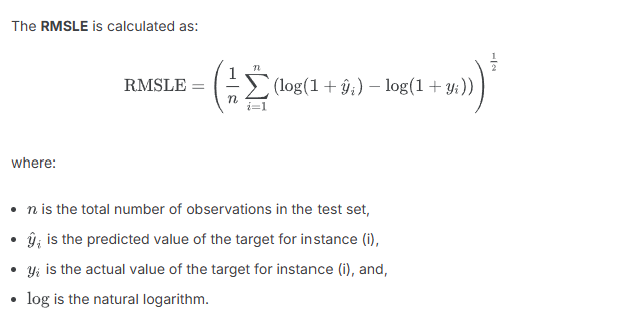

#### Submision

For each `id` row in the test set, you must predict the continuous target, `Calories`. The file should contain a header and have the following format:

```
id,Calories
750000,93.2
750001,27.42
750002,103.8
etc.
```

In [3]:
# Reusable code to extract the contents from the zip file 

import zipfile
import os

zip_path = "data/playground-series-s5e5.zip"
extract_dir = "data/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)

Files extracted to: data/


In [14]:
# Perform intial EDA to understand the data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Path of the training file to read
train_path = 'data/train.csv'
train_data = pd.read_csv(train_path)

print(train_data.columns)
print(train_data.head)

encoder = LabelEncoder()
train_data['Sex_encoded'] = encoder.fit_transform(train_data['Sex'])

print(train_data.columns)
print(train_data.head)

## This gives the number of missing values per column
# nan_count_per_column = train_data.isna().sum()
# print(nan_count_per_column)

# Check if any value in the DataFrame is NaN
has_nan = train_data.isna().any().any()
print("Does the training data contain any missing values: ", has_nan)

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')
<bound method NDFrame.head of             id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.

In [16]:
# Select the features to train the model
feature_columns = ['Sex_encoded', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
X = train_data[feature_columns]
y = train_data.Calories

In [18]:
# Linear Regression Model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate RMSLE (for evaluation)
rmsle = np.sqrt(mean_squared_log_error(y, y_pred))
print(f"RMSLE: {rmsle}")

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain values less than or equal to -1.